Curve Building and Spread Calculation, Chi Zhang

## LIBOR and SOFR curve loading

In [1]:
import pandas as pd
from math import exp
import matplotlib.pyplot as plt

In [2]:
LIBOR_data = pd.read_excel(r'C:\Users\Richard\Desktop\CurrentTerm\ISYE 8900\Data\WklyLIBOR.xlsx', sheet_name=None)
LIBOR_data.keys()

dict_keys(['181102', '181109', '181116', '181123', '181130', '181207', '181214', '181221', '181228', '190104', '190111', '190118', '190125', '190201', '190208', '190215', '190222', '190301', '190308', '190315', '190322', '190329', '190405', '190412', '190419', '190426', '190503', '190510', '190517', '190524', '190531', '190607', '190614', '190621', '190628', '190705', '190712', '190719', '190726', '190802', '190809', '190816', '190823', '190830', '190906', '190913', '190920', '190927', '191004', '191011', '191018', '191025', '191101', '191108', '191115', '191122', '191129', '191206', '191213', '191220', '191227', '200103', '200110', '200117', '200124', '200131', '200207', '200214', '200221', '200228', '200306', '200313', '200320', '200327', '200403', '200410', '200417', '200424', '200501', '200508', '200515', '200522', '200529', '200605', '200612', '200619', '200626', '200703', '200710', '200717', '200724', '200731', '200807', '200814', '200821', '200828', '200904', '200911', '200918',

In [3]:
for key in LIBOR_data:
    if key == '181102':
        LIBOR_zero = LIBOR_data[key]['Zero Rate'].to_frame(name = key)
        LIBOR_fwd = LIBOR_data[key]['Forward Rate'].to_frame(name = key)
    else:
        LIBOR_zero[key] = LIBOR_data[key]['Zero Rate']
        LIBOR_fwd[key] = LIBOR_data[key]['Forward Rate']
LIBOR_zero = LIBOR_zero.T
LIBOR_fwd = LIBOR_fwd.T

In [4]:
LIBOR_zero.columns = [3 * x for x in LIBOR_zero.columns]
LIBOR_zero

,0,3,6,9,12,15,18,21,24,27,...,330,333,336,339,342,345,348,351,354,357
181102,2.61972,2.619717,2.774752,2.854803,2.932020,2.993549,3.041323,3.071053,3.087379,3.101980,...,3.325801,3.324922,3.323999,3.323051,3.322096,3.321101,3.320063,3.318991,3.317906,3.316760
181109,2.64565,2.645652,2.787011,2.867154,2.943816,3.005727,3.053632,3.080879,3.094139,3.106960,...,3.274852,3.273796,3.272711,3.271608,3.270523,3.269381,3.268219,3.267033,3.265851,3.264617
181116,2.67221,2.672210,2.769769,2.826092,2.880055,2.923548,2.956085,2.967827,2.968256,2.971993,...,3.198483,3.197749,3.196980,3.196180,3.195376,3.194512,3.193610,3.192671,3.191713,3.190692
181123,2.71923,2.719228,2.806461,2.847600,2.890131,2.926382,2.953094,2.966664,2.972859,2.978062,...,3.182218,3.181558,3.180872,3.180150,3.179415,3.178641,3.177825,3.176974,3.176107,3.175183
181130,2.76469,2.764687,2.833875,2.863447,2.895275,2.924858,2.945426,2.945855,2.939158,2.936833,...,3.126252,3.125658,3.125033,3.124374,3.123658,3.122894,3.122091,3.121237,3.120320,3.119348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201002,0.23667,0.236672,0.239540,0.225065,0.217731,0.213807,0.214528,0.217002,0.221080,0.225428,...,1.144198,1.145238,1.146219,1.147112,1.147898,1.148599,1.149209,1.149715,1.150107,1.150396
201009,0.22718,0.227178,0.233349,0.224311,0.219946,0.219248,0.223241,0.230714,0.240486,0.249191,...,1.247444,1.248605,1.249700,1.250711,1.251614,1.252437,1.253175,1.253813,1.254338,1.254765
201016,0.22135,0.221351,0.230009,0.219294,0.212997,0.211585,0.216810,0.223916,0.231390,0.239202,...,1.197151,1.198118,1.199020,1.199843,1.200570,1.201222,1.201795,1.202276,1.202657,1.202949
201023,0.21945,0.219446,0.233067,0.224358,0.218921,0.217158,0.222589,0.230759,0.238936,0.247750,...,1.320828,1.321901,1.322903,1.323819,1.324628,1.325354,1.325992,1.326530,1.326956,1.327283


In [5]:
LIBOR_fwd.columns = [3 * x for x in LIBOR_fwd.columns]
LIBOR_fwd

,0,3,6,9,12,15,18,21,24,27,...,330,333,336,339,342,345,348,351,354,357
181102,2.59238,2.903538,2.985971,3.130304,3.206372,3.252074,3.216475,3.169696,3.184642,3.200711,...,3.195449,3.191164,3.186454,3.181188,3.176156,3.170518,3.164487,3.157919,3.151577,3.144555
181109,2.61813,2.903324,2.994793,3.140396,3.219987,3.264977,3.211565,3.155242,3.174927,3.194351,...,3.126309,3.122392,3.118240,3.113567,3.109513,3.104793,3.099880,3.094567,3.089597,3.084113
181116,2.64450,2.841226,2.907418,3.010057,3.065634,3.090419,3.007532,2.941536,2.971411,3.004042,...,3.086174,3.081674,3.076791,3.071269,3.066206,3.060328,3.054115,3.047383,3.040836,3.033625
181123,2.69119,2.866187,2.901154,2.986355,3.039893,3.058051,3.017174,2.985912,2.989730,2.995471,...,3.078163,3.073918,3.069409,3.064376,3.059598,3.054296,3.048667,3.042577,3.036735,3.030301
181130,2.73613,2.872302,2.892561,2.961161,3.013242,3.017201,2.918850,2.862749,2.888362,2.917035,...,3.030565,3.025011,3.019106,3.013134,3.006420,2.999198,2.991725,2.983917,2.975519,2.966626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201002,0.23350,0.239221,0.193476,0.193329,0.195573,0.215258,0.228760,0.246027,0.256453,0.271121,...,1.245927,1.239036,1.231283,1.222854,1.213821,1.203966,1.193307,1.182007,1.170114,1.157368
201009,0.22413,0.236444,0.203461,0.204213,0.213572,0.240250,0.271949,0.304150,0.314034,0.327497,...,1.360302,1.353868,1.346680,1.338835,1.330430,1.321245,1.311292,1.300715,1.289589,1.277654
201016,0.21838,0.235657,0.195200,0.191697,0.203213,0.240080,0.263068,0.279441,0.297175,0.319283,...,1.288990,1.282713,1.275787,1.268311,1.260366,1.251749,1.242473,1.232674,1.222415,1.211460
201023,0.21650,0.243682,0.204157,0.200062,0.207338,0.246816,0.276127,0.291703,0.313460,0.342872,...,1.423174,1.416264,1.408628,1.400372,1.391599,1.382077,1.371818,1.360969,1.349613,1.337481


In [6]:
SOFR_data = pd.read_excel(r'C:\Users\Richard\Desktop\CurrentTerm\ISYE 8900\Data\WklySOFR.xlsx', sheet_name=None)
SOFR_data.keys()

dict_keys(['181102', '181109', '181116', '181123', '181130', '181207', '181214', '181221', '181228', '190104', '190111', '190118', '190125', '190201', '190208', '190215', '190222', '190301', '190308', '190315', '190322', '190329', '190405', '190412', '190419', '190426', '190503', '190510', '190517', '190524', '190531', '190607', '190614', '190621', '190628', '190705', '190712', '190719', '190726', '190802', '190809', '190816', '190823', '190830', '190906', '190913', '190920', '190927', '191004', '191011', '191018', '191025', '191101', '191108', '191115', '191122', '191129', '191206', '191213', '191220', '191227', '200103', '200110', '200117', '200124', '200131', '200207', '200214', '200221', '200228', '200306', '200313', '200320', '200327', '200403', '200410', '200417', '200424', '200501', '200508', '200515', '200522', '200529', '200605', '200612', '200619', '200626', '200703', '200710', '200717', '200724', '200731', '200807', '200814', '200821', '200828', '200904', '200911', '200918',

In [7]:
for key in SOFR_data:
    if key == '181102':
        SOFR_zero = SOFR_data[key]['Zero Rate'].to_frame(name = key)
        SOFR_fwd = SOFR_data[key]['Forward Rate'].to_frame(name = key)
    else:
        SOFR_zero[key] = SOFR_data[key]['Zero Rate']
        SOFR_fwd[key] = SOFR_data[key]['Forward Rate']
SOFR_zero = SOFR_zero.T
SOFR_fwd = SOFR_fwd.T

In [8]:
SOFR_zero.columns = [3 * x for x in SOFR_zero.columns]
SOFR_zero

,0,3,6,9,12,15,18,21,24,27,...,330,333,336,339,342,345,348,351,354,357
181102,2.28118,2.373699,2.463044,2.553376,2.625769,2.684098,2.729736,2.762130,2.783948,2.798830,...,2.916118,2.914583,2.913024,2.911458,2.909940,2.908368,2.906795,2.905224,2.903689,2.902124
181109,2.23049,2.401917,2.496093,2.587192,2.660280,2.717140,2.760476,2.791885,2.813340,2.826419,...,2.879542,2.877726,2.875909,2.874095,2.872347,2.870550,2.868767,2.867001,2.865292,2.863568
181116,2.29132,2.394863,2.469053,2.537460,2.590208,2.629339,2.652995,2.670554,2.682351,2.688599,...,2.788653,2.786958,2.785234,2.783504,2.781830,2.780101,2.778380,2.776670,2.775012,2.773336
181123,2.26090,2.421064,2.493004,2.552530,2.597124,2.630589,2.654954,2.671437,2.681246,2.685933,...,2.764918,2.763200,2.761433,2.759663,2.757932,2.756191,2.754444,2.752716,2.751050,2.749376
181130,2.31159,2.436342,2.507023,2.559255,2.594308,2.618487,2.637883,2.648915,2.654119,2.655961,...,2.751414,2.750094,2.748776,2.747460,2.746103,2.744734,2.743369,2.741993,2.740591,2.739180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201002,0.10139,0.070069,0.071264,0.065684,0.061017,0.056615,0.050682,0.043047,0.036489,0.033091,...,0.898437,0.898687,0.898862,0.898960,0.898986,0.898941,0.898827,0.898646,0.898405,0.898100
201009,0.09125,0.080799,0.074710,0.071865,0.069934,0.065816,0.060817,0.057642,0.056758,0.058231,...,0.979293,0.980291,0.981225,0.982081,0.982840,0.983527,0.984136,0.984657,0.985080,0.985418
201016,0.09125,0.084752,0.080081,0.074652,0.070947,0.069266,0.065984,0.059342,0.053970,0.053249,...,0.934250,0.935055,0.935801,0.936475,0.937065,0.937589,0.938045,0.938424,0.938721,0.938945
201023,0.08111,0.087590,0.082615,0.077439,0.073987,0.070157,0.065883,0.064113,0.064358,0.066051,...,1.063448,1.064580,1.065641,1.066613,1.067471,1.068240,1.068914,1.069477,1.069916,1.070244


In [9]:
SOFR_fwd.columns = [3 * x for x in SOFR_fwd.columns]
SOFR_fwd

,0,3,6,9,12,15,18,21,24,27,...,330,333,336,339,342,345,348,351,354,357
181102,2.348200,2.528264,2.702975,2.811728,2.886164,2.931598,2.925137,2.906019,2.885445,2.864508,...,2.716948,2.713033,2.709267,2.705445,2.702419,2.699225,2.696223,2.693241,2.690851,2.688422
181109,2.376200,2.566022,2.738057,2.848063,2.913206,2.950525,2.948884,2.929799,2.901185,2.872981,...,2.651642,2.648008,2.644780,2.641711,2.639619,2.637600,2.635987,2.634600,2.633997,2.633788
181116,2.369200,2.518681,2.644333,2.718508,2.756101,2.744499,2.746535,2.735944,2.709229,2.681077,...,2.572655,2.568153,2.564087,2.560290,2.557512,2.554894,2.552765,2.550957,2.549989,2.549312
181123,2.395200,2.539412,2.644151,2.701342,2.735016,2.750021,2.741060,2.721131,2.695410,2.669785,...,2.544401,2.539868,2.535910,2.532488,2.530092,2.528185,2.526937,2.526196,2.526480,2.527266
181130,2.410200,2.549144,2.634941,2.671852,2.687357,2.705879,2.686622,2.662777,2.643030,2.623000,...,2.578800,2.574652,2.570565,2.566746,2.562717,2.558635,2.554682,2.550814,2.546850,2.542834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201002,0.069115,0.071498,0.053781,0.046527,0.038615,0.020274,-0.002806,-0.008869,0.006049,0.030620,...,0.914671,0.906594,0.898495,0.890497,0.882609,0.874668,0.866708,0.858848,0.851096,0.843292
201009,0.079700,0.067553,0.065276,0.063328,0.048805,0.034945,0.038036,0.049935,0.068608,0.092632,...,1.077013,1.070747,1.063916,1.056621,1.048910,1.040604,1.031724,1.022404,1.012676,1.002332
201016,0.083600,0.074282,0.062925,0.059136,0.061746,0.048647,0.019147,0.016493,0.046878,0.082283,...,1.011243,1.005252,0.998853,0.992138,0.985147,0.977721,0.969878,0.961738,0.953327,0.944465
201023,0.086400,0.076474,0.066173,0.062874,0.054213,0.043579,0.052742,0.065162,0.078401,0.101235,...,1.175010,1.168070,1.160200,1.151521,1.142093,1.131700,1.120361,1.108253,1.095411,1.081567


## Treasury yield curve loading and constructing

In [37]:
def NSS_zero_cstrct(T, beta0,beta1,beta2,beta3,tau1,tau2):
    if T < 1/365: T = 1/365
    exp_tt1 = exp(-T/tau1)
    exp_tt2 = exp(-T/tau2)
    factor1 = (1 - exp_tt1) / (T / tau1)
    factor2 = factor1 - exp_tt1
    factor3 = (1 - exp_tt2) / (T / tau2) - exp_tt2
    res = beta0 + beta1*factor1 + beta2*factor2 + beta3*factor3
    return res

def NSS_fwd_cstrct(T, beta0,beta1,beta2,beta3,tau1,tau2):
    if T < 1/365: T = 1/365
    exp_tt1 = exp(-T/tau1)
    exp_tt2 = exp(-T/tau2)
    return beta0 + beta1*exp_tt1 + beta2*exp_tt1*T/tau1 + beta3*exp_tt2*T/tau2

In [38]:
Treasury_data = pd.read_csv(r'C:\Users\Richard\Desktop\CurrentTerm\ISYE 8900\Data\feds200628.csv', index_col = 'Date', usecols = ['Date','BETA0','BETA1','BETA2','BETA3','TAU1','TAU2'], skiprows=9)
Treasury_data

,BETA0,BETA1,BETA2,BETA3,TAU1,TAU2
Date,,,,,,
1961-06-14,3.917606,-1.277955,-1.949397,0.000000,0.339218,-999.990000
1961-06-15,3.978498,-1.257404,-2.247617,0.000000,0.325775,-999.990000
1961-06-16,3.984350,-1.429538,-1.885024,0.000000,0.348817,-999.990000
1961-06-19,4.004379,-0.723311,-3.310743,0.000000,0.282087,-999.990000
1961-06-20,3.985789,-0.900432,-2.844809,0.000000,0.310316,-999.990000
...,...,...,...,...,...,...
2021-01-04,5.484257,-5.274936,-4.884348,-8.691812,3.254356,18.935793
2021-01-05,5.720749,-5.513988,-5.025172,-9.189046,3.285304,19.250796
2021-01-06,6.333407,-6.130441,-5.363008,-10.488664,3.346462,19.919670


### index format transform

In [39]:
LIBOR_zero.index = pd.to_datetime(LIBOR_zero.index, format = '%y%m%d')
LIBOR_zero.index

DatetimeIndex(['2018-11-02', '2018-11-09', '2018-11-16', '2018-11-23',
               '2018-11-30', '2018-12-07', '2018-12-14', '2018-12-21',
               '2018-12-28', '2019-01-04',
               ...
               '2020-08-28', '2020-09-04', '2020-09-11', '2020-09-18',
               '2020-09-25', '2020-10-02', '2020-10-09', '2020-10-16',
               '2020-10-23', '2020-10-30'],
              dtype='datetime64[ns]', length=105, freq=None)

In [40]:
LIBOR_fwd.index = pd.to_datetime(LIBOR_fwd.index, format = '%y%m%d')
SOFR_zero.index = pd.to_datetime(SOFR_zero.index, format = '%y%m%d')
SOFR_fwd.index = pd.to_datetime(SOFR_fwd.index, format = '%y%m%d')

In [41]:
Treasury_data.index = pd.to_datetime(Treasury_data.index, infer_datetime_format=True)
Treasury_data.index

DatetimeIndex(['1961-06-14', '1961-06-15', '1961-06-16', '1961-06-19',
               '1961-06-20', '1961-06-21', '1961-06-22', '1961-06-23',
               '1961-06-26', '1961-06-27',
               ...
               '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31',
               '2021-01-01', '2021-01-04', '2021-01-05', '2021-01-06',
               '2021-01-07', '2021-01-08'],
              dtype='datetime64[ns]', name='Date', length=15543, freq=None)

In [42]:
Treasury_data = Treasury_data.loc[LIBOR_zero.index]
Treasury_data

,BETA0,BETA1,BETA2,BETA3,TAU1,TAU2
2018-11-02,3.659050,-1.657847,-0.000061,-1.523731,0.501227,2.650654
2018-11-09,3.554549,-1.658618,-0.000029,-1.258271,0.409790,2.610036
2018-11-16,3.529693,-1.477785,0.000023,-1.711106,0.424259,2.458331
2018-11-23,3.488041,-1.629262,0.000032,-1.712192,0.333062,2.336264
2018-11-30,3.554822,-1.116583,2566.759079,-2567.450262,1.996904,1.997857
...,...,...,...,...,...,...
2020-10-02,2.626555,-2.423157,-1.736197,-3.046891,2.593191,6.261339
2020-10-09,2.785045,-2.573144,-2.056902,-2.896585,2.628277,6.952814
2020-10-16,2.715992,-2.512198,-2.011196,-2.984761,2.524663,6.862456
2020-10-23,2.932772,-2.719752,-2.446390,-2.835959,2.604734,7.899201


In [43]:
Treasury_zero = pd.DataFrame(index = Treasury_data.index, columns = LIBOR_zero.columns)
Treasury_fwd = pd.DataFrame(index = Treasury_data.index, columns = LIBOR_fwd.columns)

In [44]:
for col in Treasury_zero.columns:
    Treasury_zero[col]=Treasury_data.apply(lambda x: NSS_zero_cstrct(col/12,x['BETA0'],x['BETA1'],x['BETA2'],x['BETA3'],x['TAU1'],x['TAU2']), axis=1)
    Treasury_fwd[col]=Treasury_data.apply(lambda x: NSS_fwd_cstrct(col/12,x['BETA0'],x['BETA1'],x['BETA2'],x['BETA3'],x['TAU1'],x['TAU2']), axis=1)

In [45]:
Treasury_zero = Treasury_zero.fillna(method='bfill')
Treasury_zero.isnull().values.any()

False

In [46]:
Treasury_fwd = Treasury_fwd.fillna(method='ffill')
Treasury_fwd.isnull().values.any()

False

### visulization for cross-sectional

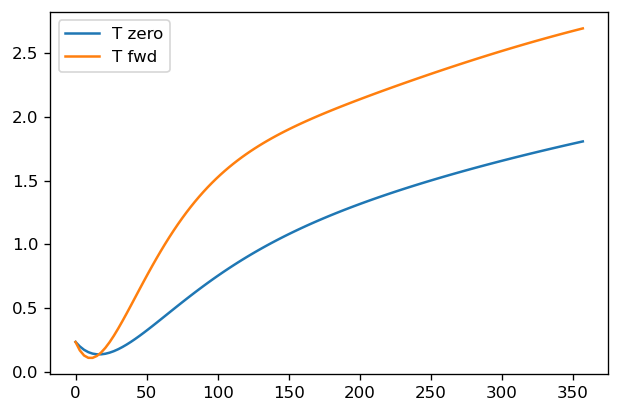

In [47]:
plt.figure(1,dpi=120)
l1, = plt.plot(Treasury_zero.columns, Treasury_zero.loc['2020-10-30'])
l2, = plt.plot(Treasury_fwd.columns, Treasury_fwd.loc['2020-10-30'])
plt.legend(handles=[l1,l2], labels = ['T zero','T fwd'], loc='best')

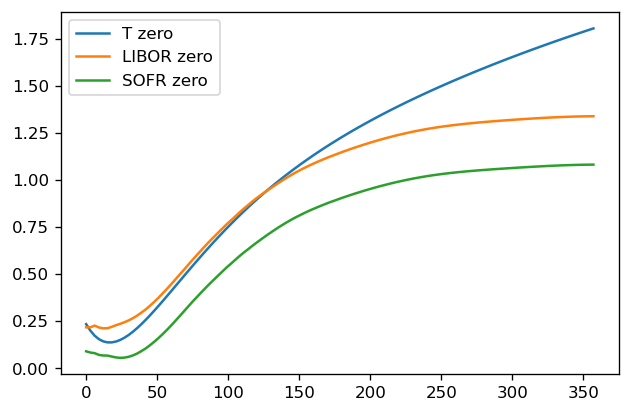

In [48]:
plt.figure(2,dpi=120)
l1, = plt.plot(Treasury_zero.columns, Treasury_zero.loc['2020-10-30'])
l2, = plt.plot(LIBOR_zero.columns, LIBOR_zero.loc['2020-10-30'])
l3, = plt.plot(SOFR_zero.columns, SOFR_zero.loc['2020-10-30'])
plt.legend(handles=[l1,l2,l3], labels = ['T zero','LIBOR zero','SOFR zero'], loc='best')

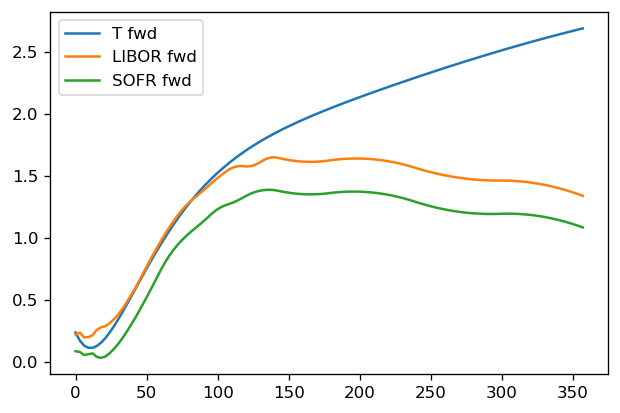

In [49]:
plt.figure(3,dpi=120)
l1, = plt.plot(Treasury_fwd.columns, Treasury_fwd.loc['2020-10-30'])
l2, = plt.plot(LIBOR_fwd.columns, LIBOR_fwd.loc['2020-10-30'])
l3, = plt.plot(SOFR_fwd.columns, SOFR_fwd.loc['2020-10-30'])
plt.legend(handles=[l1,l2,l3], labels = ['T fwd','LIBOR fwd','SOFR fwd'], loc='best')

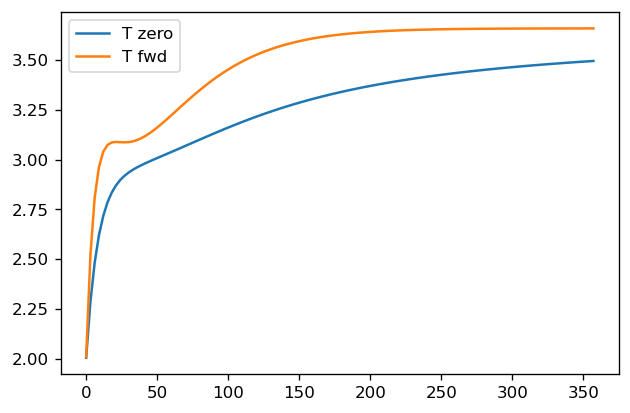

In [50]:
plt.figure(4,dpi=120)
l1, = plt.plot(Treasury_zero.columns, Treasury_zero.loc['2018-11-02'])
l2, = plt.plot(Treasury_fwd.columns, Treasury_fwd.loc['2018-11-02'])
plt.legend(handles=[l1,l2], labels = ['T zero','T fwd'], loc='best')

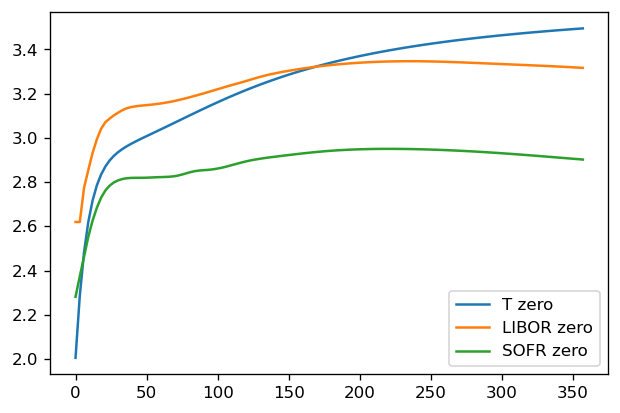

In [51]:
plt.figure(5,dpi=120)
l1, = plt.plot(Treasury_zero.columns, Treasury_zero.loc['2018-11-02'])
l2, = plt.plot(LIBOR_zero.columns, LIBOR_zero.loc['2018-11-02'])
l3, = plt.plot(SOFR_zero.columns, SOFR_zero.loc['2018-11-02'])
plt.legend(handles=[l1,l2,l3], labels = ['T zero','LIBOR zero','SOFR zero'], loc='best')

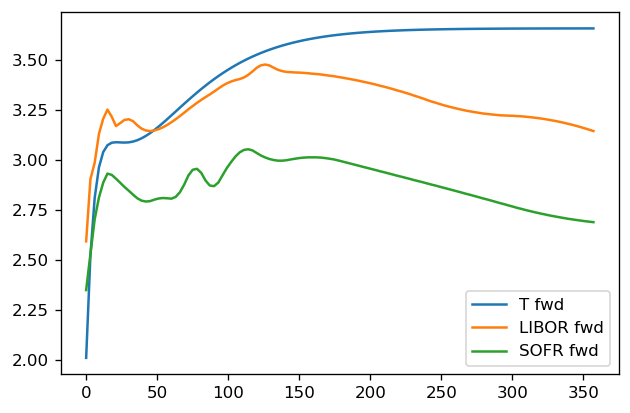

In [52]:
plt.figure(6,dpi=120)
l1, = plt.plot(Treasury_fwd.columns, Treasury_fwd.loc['2018-11-02'])
l2, = plt.plot(LIBOR_fwd.columns, LIBOR_fwd.loc['2018-11-02'])
l3, = plt.plot(SOFR_fwd.columns, SOFR_fwd.loc['2018-11-02'])
plt.legend(handles=[l1,l2,l3], labels = ['T fwd','LIBOR fwd','SOFR fwd'], loc='best')

### visulization for time series

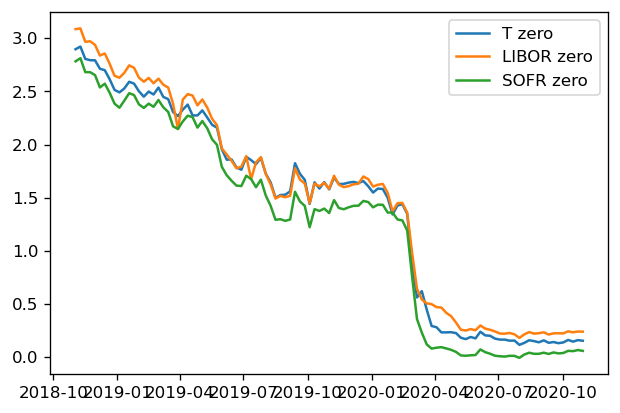

In [55]:
plt.figure(7,dpi=120)
l1, = plt.plot(Treasury_zero.index, Treasury_zero[24])
l2, = plt.plot(LIBOR_zero.index, LIBOR_zero[24])
l3, = plt.plot(SOFR_zero.index, SOFR_zero[24])
plt.legend(handles=[l1,l2,l3], labels = ['T zero','LIBOR zero','SOFR zero'], loc='best')

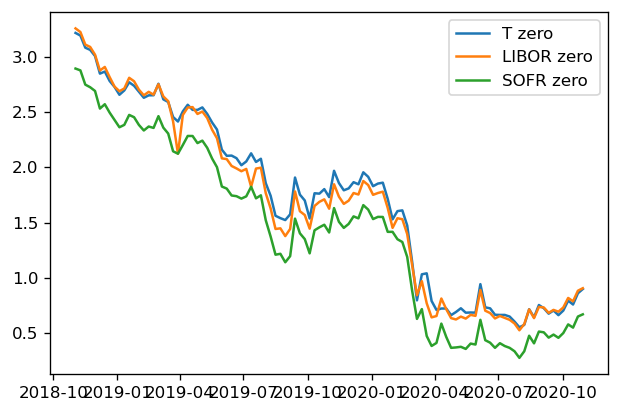

In [56]:
plt.figure(8,dpi=120)
l1, = plt.plot(Treasury_zero.index, Treasury_zero[120])
l2, = plt.plot(LIBOR_zero.index, LIBOR_zero[120])
l3, = plt.plot(SOFR_zero.index, SOFR_zero[120])
plt.legend(handles=[l1,l2,l3], labels = ['T zero','LIBOR zero','SOFR zero'], loc='best')

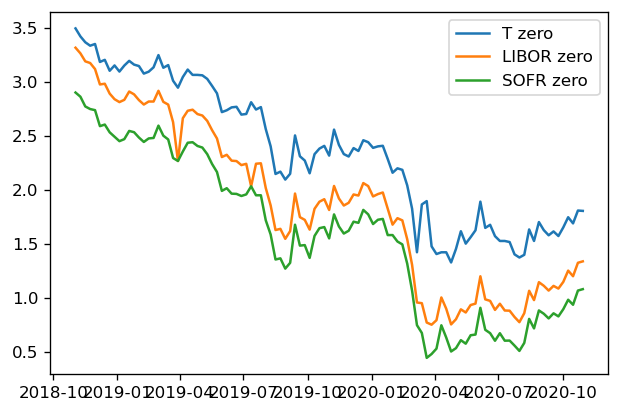

In [57]:
plt.figure(9,dpi=120)
l1, = plt.plot(Treasury_zero.index, Treasury_zero[357])
l2, = plt.plot(LIBOR_zero.index, LIBOR_zero[357])
l3, = plt.plot(SOFR_zero.index, SOFR_zero[357])
plt.legend(handles=[l1,l2,l3], labels = ['T zero','LIBOR zero','SOFR zero'], loc='best')

## spread calculation

In [64]:
SwapSpd_zero = LIBOR_zero - Treasury_zero
BasisSpd_zero = LIBOR_zero - SOFR_zero

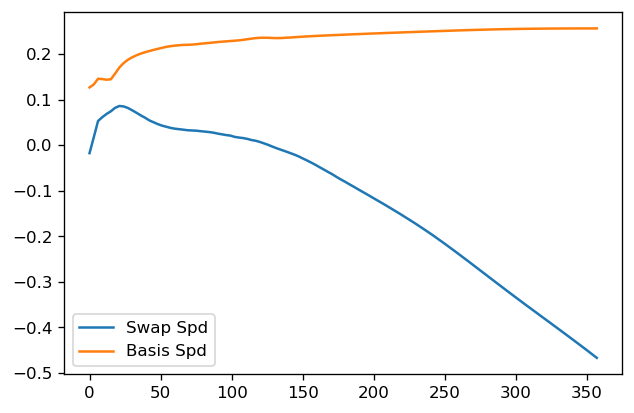

In [66]:
plt.figure(10,dpi=120)
l1, = plt.plot(SwapSpd_zero.columns, SwapSpd_zero.loc['2020-10-30'])
l2, = plt.plot(BasisSpd_zero.columns, BasisSpd_zero.loc['2020-10-30'])
plt.legend(handles=[l1,l2], labels = ['Swap Spd','Basis Spd'], loc='best')

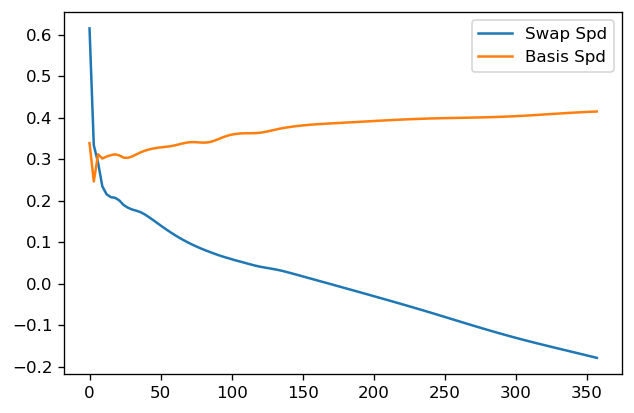

In [67]:
plt.figure(11,dpi=120)
l1, = plt.plot(SwapSpd_zero.columns, SwapSpd_zero.loc['2018-11-02'])
l2, = plt.plot(BasisSpd_zero.columns, BasisSpd_zero.loc['2018-11-02'])
plt.legend(handles=[l1,l2], labels = ['Swap Spd','Basis Spd'], loc='best')

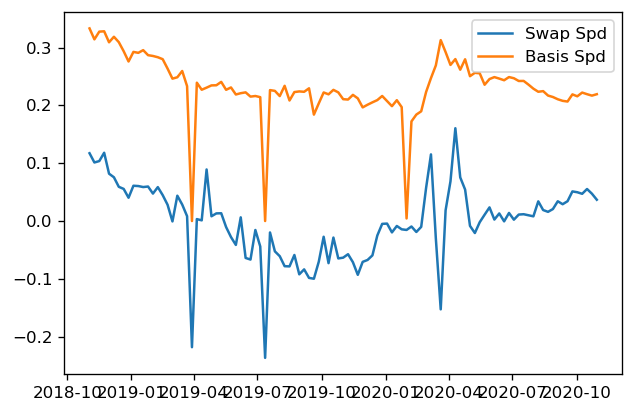

In [68]:
plt.figure(12,dpi=120)
l1, = plt.plot(SwapSpd_zero.index, SwapSpd_zero[60])
l2, = plt.plot(BasisSpd_zero.index, BasisSpd_zero[60])
plt.legend(handles=[l1,l2], labels = ['Swap Spd','Basis Spd'], loc='best')